In [1]:
import yfinance as yf

# Create ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get historical data with max period
tesla_data = tesla.history(period="max")

# Reset index and display first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parse HTML
soup = BeautifulSoup(html_data, 'html5lib')

# Extract table and create dataframe
tesla_revenue = pd.read_html(str(soup))[1]
tesla_revenue.columns = ['Date', 'Revenue']

# Clean Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display last 5 rows
tesla_revenue.tail()

/tmp/ipython-input-2-3530619857.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(soup))[1]


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [3]:
# Create ticker object for GameStop
gme = yf.Ticker("GME")

# Get historical data with max period
gme_data = gme.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [4]:
# Download webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# Parse HTML
soup = BeautifulSoup(html_data_2, 'html5lib')

# Extract table and create dataframe
gme_revenue = pd.read_html(str(soup))[1]
gme_revenue.columns = ['Date', 'Revenue']

# Clean Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Display last 5 rows
gme_revenue.tail()

/tmp/ipython-input-4-3461164984.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(soup))[1]


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


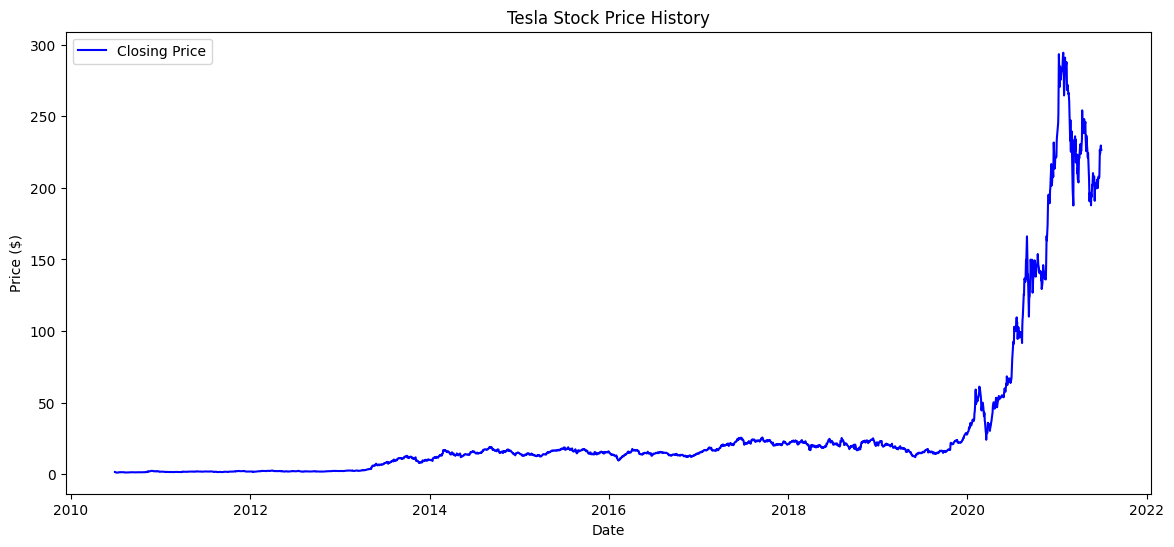

In [5]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 6))

    # Plot stock closing price
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')

    # Add title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price ($)')

    # Add legend
    plt.legend()

    plt.show()

# Filter data up to June 2021
tesla_data_june = tesla_data[tesla_data['Date'] <= '2021-06-30']
make_graph(tesla_data_june, tesla_revenue, 'Tesla Stock Price History')

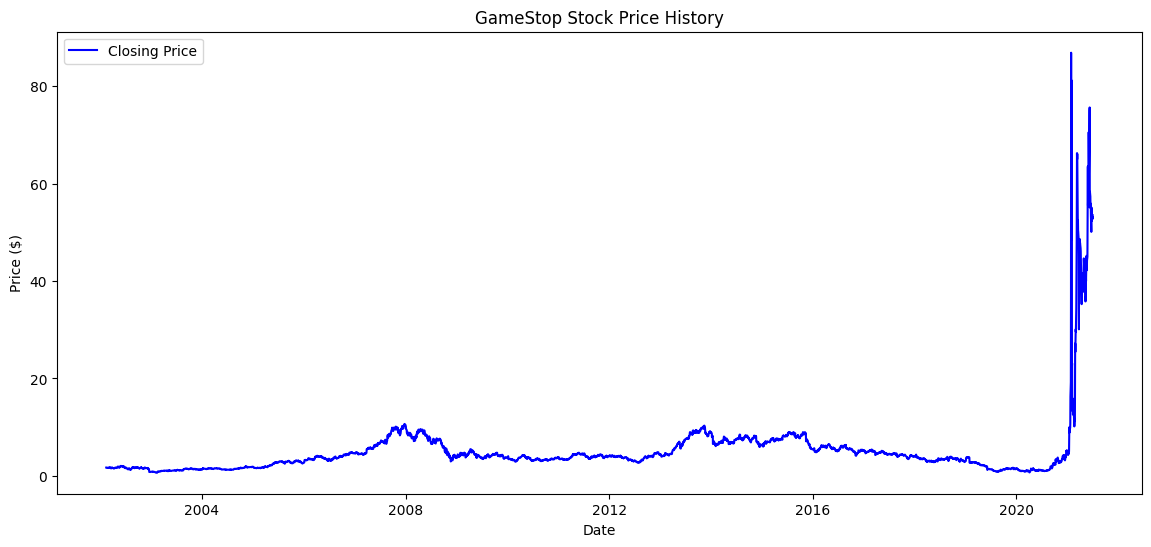

In [6]:
# Filter data up to June 2021
gme_data_june = gme_data[gme_data['Date'] <= '2021-06-30']
make_graph(gme_data_june, gme_revenue, 'GameStop Stock Price History')